In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape


(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

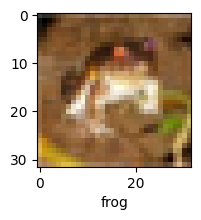

In [ ]:
plot_sample(X_train, y_train, 0)

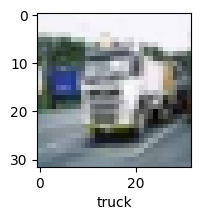

In [ ]:
plot_sample(X_train, y_train, 1000)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [ ]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 142s 90ms/step - loss: 1.8113 - accuracy: 0.3552
Epoch 2/10
1563/1563 [==============================] - 134s 86ms/step - loss: 1.6229 - accuracy: 0.4283
Epoch 3/10
1563/1563 [==============================] - 136s 87ms/step - loss: 1.5411 - accuracy: 0.4551
Epoch 4/10
1563/1563 [==============================] - 157s 100ms/step - loss: 1.4804 - accuracy: 0.4771
Epoch 5/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4327 - accuracy: 0.4954
Epoch 6/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.3904 - accuracy: 0.5094
Epoch 7/10
1563/1563 [==============================] - 134s 86ms/step - loss: 1.3511 - accuracy: 0.5239
Epoch 8/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.3171 - accuracy: 0.5348
Epoch 9/10
1563/1563 [==============================] - 134s 86ms/step - loss: 1.2885 - accuracy: 0.5483
Epoch 10/10
1563/1563 [==============================]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 11s 36ms/step


In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.56      0.60      1000
           1       0.47      0.84      0.60      1000
           2       0.50      0.28      0.36      1000
           3       0.36      0.30      0.33      1000
           4       0.64      0.25      0.36      1000
           5       0.39      0.57      0.46      1000
           6       0.42      0.81      0.55      1000
           7       0.70      0.53      0.60      1000
           8       0.80      0.46      0.58      1000
           9       0.63      0.51      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.56      0.51      0.50     10000
weighted avg       0.56      0.51      0.50     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4966 - accuracy: 0.4599
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1394 - accuracy: 0.6011
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9966 - accuracy: 0.6516
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9106 - accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8436 - accuracy: 0.7073
Epoch 6/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7885 - accuracy: 0.7238
Epoch 7/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7436 - accuracy: 0.7412
Epoch 8/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.6958 - accuracy: 0.7571
Epoch 9/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.6558 - accuracy: 0.7716
Epoch 10/10
1563/1563 [==============================] - 77s 49m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 10s 32ms/step - loss: 0.9272 - accuracy: 0.6960


[0.9272344708442688, 0.6959999799728394]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 19ms/step


array([[4.8117206e-02, 2.9258637e-04, 9.9958163e-03, 4.0557399e-01,
        4.4326028e-03, 1.9306380e-01, 1.7462627e-03, 6.3239746e-03,
        3.3035874e-01, 9.4968687e-05],
       [3.5949112e-03, 2.1451011e-02, 1.6986703e-06, 2.7647542e-07,
        4.5975921e-07, 9.5045671e-08, 1.7099870e-07, 1.4842760e-07,
        9.7426611e-01, 6.8509456e-04],
       [2.0556460e-01, 3.1176532e-02, 3.4904049e-03, 7.8130607e-03,
        3.5505055e-03, 1.8501627e-03, 3.6627019e-04, 1.8198084e-02,
        6.5491021e-01, 7.3080026e-02],
       [8.8669699e-01, 8.3405497e-03, 2.8057841e-03, 1.1868360e-03,
        1.3601206e-03, 4.8972702e-06, 1.7636015e-05, 4.7214660e-03,
        9.4181389e-02, 6.8444666e-04],
       [2.1495305e-07, 1.8962253e-05, 9.0154313e-04, 3.3890363e-02,
        6.0183521e-02, 7.7213999e-04, 9.0422887e-01, 1.1136685e-07,
        2.2519916e-06, 1.8432778e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:100]

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 2,
 2,
 9,
 4,
 3,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 3,
 7,
 9,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 5,
 5,
 7,
 2,
 2,
 8,
 5,
 3,
 8,
 8,
 7,
 5,
 5,
 3,
 7,
 5,
 6,
 3,
 6,
 2,
 1,
 0,
 5,
 9,
 8,
 6,
 8,
 8,
 0,
 2,
 0,
 3,
 5,
 8,
 8,
 9,
 1,
 7,
 2,
 7,
 0,
 8,
 9,
 9,
 0,
 6,
 8,
 6,
 2,
 6,
 6,
 0,
 0,
 3,
 4,
 5,
 6,
 3,
 1,
 1,
 5,
 6,
 3,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 3,
 5,
 8,
 5,
 1,
 2,
 8,
 0,
 0,
 3,
 3,
 0,
 2,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 4,
 5,
 6,
 5,
 8,
 9,
 6,
 5,
 5,
 2,
 8,
 1,
 6,
 0,
 0,
 5,
 6,
 9,
 3,
 4,
 2,
 1,
 1,
 6,
 0,
 7,
 8,
 6,
 9,
 0,
 9,
 9,
 8,
 8,
 9,
 9,
 3,
 7,
 5,
 9,
 0,
 5,
 2,
 8,
 5,
 8,
 2,
 2,
 3,
 0,
 5,
 8,
 0,
 1,
 7,
 5,
 8,
 8,
 5,
 8,
 5,
 9,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 5,
 9,
 5,
 9,
 1,
 0,
 7,
 9,
 8,
 2,
 7,
 3,
 9,
 5,
 4,
 9,
 2,
 2,
 3,
 6,
 5,
 1,
 5,
 1,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 9,
 8,
 9,
 0,
 2,
 1,
 8,
 2,
 0,


In [ ]:
y_test[:100]

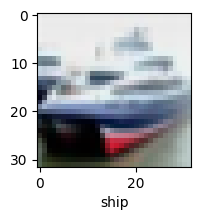

In [ ]:
plot_sample(X_test, y_test,1)

In [ ]:
classes[y_classes[1]]

'ship'